In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Подгрузка датасета.

Для начала воспользуюсь сервисом [phantasus](https://artyomovlab.wustl.edu/phantasus/), из которого выгружу файл `GSE_26728.gct` и буду работать уже с ним.

Посмотрим на данные:

In [2]:
data = pd.read_csv('GSE_26728.gct', sep='\t', skiprows=2)
data

,Name,Description,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,liver_BPALowDose_rep3,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6
0,A_51_P100034,Mif4gd,12.630,11.899,12.393,12.539,12.368,12.361,12.332,12.148,12.032,11.955,12.222,12.202,12.107,12.529,11.838,12.054,12.223,12.343
1,A_51_P100063,Lnx1,5.828,6.598,5.984,5.986,6.089,6.163,6.384,6.410,5.984,6.158,6.031,5.833,6.441,7.814,6.107,7.017,5.853,6.656
2,A_51_P100099,2610002J23Rik,7.638,7.635,7.216,7.767,7.516,7.378,7.171,7.558,7.571,7.607,7.523,7.628,7.461,7.321,7.792,7.577,7.412,7.357
3,A_51_P100155,Rpf1,10.947,10.582,10.406,11.054,10.770,10.402,10.610,10.512,10.492,10.485,10.839,10.535,10.674,10.333,10.622,10.302,10.339,10.572
4,A_51_P100174,Mns1,6.632,6.089,6.012,6.190,6.260,6.131,5.993,6.274,6.002,6.011,6.124,6.062,6.375,6.087,6.152,6.202,6.209,6.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22509,A_52_P997209,NaN,7.734,8.105,7.841,7.631,7.893,8.232,7.570,8.146,7.550,7.820,7.648,7.675,7.763,8.154,7.703,7.878,8.058,7.989
22510,A_52_P997449,NaN,10.070,9.784,9.009,10.071,9.762,9.535,9.876,9.999,10.084,10.064,10.219,10.133,9.428,9.136,9.890,10.302,10.493,9.447
22511,A_52_P99807,NaN,8.176,7.628,7.993,7.717,6.355,6.668,6.699,7.256,6.803,8.208,8.409,7.008,6.384,8.434,6.441,6.719,6.401,7.256
22512,A_52_P99848,NaN,6.951,7.187,7.154,6.452,7.582,6.585,7.758,6.601,6.838,6.869,7.436,7.073,6.741,8.453,6.870,6.755,7.348,7.659


### 2. Унификация id

В столбце name стоят не универсальные id, а кастомные id экспериментов. Т.е. может оказаться, что гены одинаковые, а поле name разное. Чтобы унифицировать обозначения перейду на [страницу платформы](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL7042) и скачаю таблицу перевода: `GPL7042-9573.txt`.

In [3]:
indexing_data = pd.read_csv('GPL7042-9573.txt', sep='\t', skiprows=17)
indexing_data.head()

/home/toharhymes/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,SPOT_ID,CONTROL_TYPE,REFSEQ,GB_ACC,GENE,GENE_SYMBOL,GENE_NAME,UNIGENE_ID,ENSEMBL_ID,TIGR_ID,ACCESSION_STRING,CHROMOSOMAL_LOCATION,CYTOBAND,DESCRIPTION,GO_ID,SEQUENCE
0,A_51_P100021,A_51_P100021,False,NaN,AY454345,16656.0,Hivep3,human immunodeficiency virus type I enhancer b...,Mm.302758,NaN,NaN,gb|AY454345|tc|TC1584815|nap|NAP057482-1,chr4:119807944-119808005,mm|4qD2.1,Mus musculus clone pZAS3 328-2275 zinc finger ...,GO:0003676(nucleic acid binding)|GO:0003677(DN...,CATGGCTGGATTAACGTATGTGTGTGGTATATAGATACACAGAGAG...
1,A_51_P100034,A_51_P100034,False,NM_027162,NM_027162,69674.0,Mif4gd,MIF4G domain containing,Mm.390387,NaN,NaN,ref|NM_027162|ref|NM_001243586|ref|NM_00124358...,chr11:115469328-115469269,mm|11qE2,"Mus musculus MIF4G domain containing (Mif4gd),...",GO:0005488(binding)|GO:0005575(cellular_compon...,GAGACTTTTGTGGAGGAAGCCTGTTTCCTCCAGTCATGAGTGACTG...
2,A_51_P100052,A_51_P100052,False,NM_198863,NM_198863,245450.0,Slitrk2,"SLIT and NTRK-like family, member 2",Mm.336081,ENSMUST00000036043,NaN,ref|NM_198863|ref|NM_001161431|ens|ENSMUST0000...,chrX:63908145-63908204,mm|XqA7.1,"Mus musculus SLIT and NTRK-like family, member...",GO:0003674(molecular_function)|GO:0007409(axon...,CTAAATGTGAATTGCCAAGAAAGGAAGTTCACTAACATCTCTGACC...
3,A_51_P100063,A_51_P100063,False,NM_010727,NM_010727,16924.0,Lnx1,ligand of numb-protein X 1,Mm.440403,NaN,NaN,ref|NM_010727|ref|NM_001159577|ref|NM_00115957...,chr5:74993810-74993386,mm|5qC3.3,Mus musculus ligand of numb-protein X 1 (Lnx1)...,GO:0004842(ubiquitin-protein ligase activity)|...,GAAGAATCAGATGTGGTGACATTCTTCTCGCTGTCAACGGTAGAAG...
4,A_51_P100084,A_51_P100084,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nap|NAP091803-1,unmapped,NaN,NaN,NaN,AAGTCATCTCTCATGCCTATCAGAATACTCTGCCTCTAAGCCCAAA...


Возьму общепринятый -  Entrez (Gene), если он достаточно хорошо замапится:

In [4]:
indexing_data = indexing_data[['ID', 'GENE']]
data = data.rename(columns={'Name':'ID'})
data = data.merge(indexing_data, on='ID')
data

,ID,Description,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,...,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6,GENE
0,A_51_P100034,Mif4gd,12.630,11.899,12.393,12.539,12.368,12.361,12.332,12.148,...,11.955,12.222,12.202,12.107,12.529,11.838,12.054,12.223,12.343,69674.0
1,A_51_P100063,Lnx1,5.828,6.598,5.984,5.986,6.089,6.163,6.384,6.410,...,6.158,6.031,5.833,6.441,7.814,6.107,7.017,5.853,6.656,16924.0
2,A_51_P100099,2610002J23Rik,7.638,7.635,7.216,7.767,7.516,7.378,7.171,7.558,...,7.607,7.523,7.628,7.461,7.321,7.792,7.577,7.412,7.357,69886.0
3,A_51_P100155,Rpf1,10.947,10.582,10.406,11.054,10.770,10.402,10.610,10.512,...,10.485,10.839,10.535,10.674,10.333,10.622,10.302,10.339,10.572,70285.0
4,A_51_P100174,Mns1,6.632,6.089,6.012,6.190,6.260,6.131,5.993,6.274,...,6.011,6.124,6.062,6.375,6.087,6.152,6.202,6.209,6.172,17427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22509,A_52_P997209,NaN,7.734,8.105,7.841,7.631,7.893,8.232,7.570,8.146,...,7.820,7.648,7.675,7.763,8.154,7.703,7.878,8.058,7.989,NaN
22510,A_52_P997449,NaN,10.070,9.784,9.009,10.071,9.762,9.535,9.876,9.999,...,10.064,10.219,10.133,9.428,9.136,9.890,10.302,10.493,9.447,NaN
22511,A_52_P99807,NaN,8.176,7.628,7.993,7.717,6.355,6.668,6.699,7.256,...,8.208,8.409,7.008,6.384,8.434,6.441,6.719,6.401,7.256,233115.0
22512,A_52_P99848,NaN,6.951,7.187,7.154,6.452,7.582,6.585,7.758,6.601,...,6.869,7.436,7.073,6.741,8.453,6.870,6.755,7.348,7.659,18707.0


In [5]:
data.count()

ID                        22514
Description                  10
liver_control_rep1        22514
liver_control_rep2        22514
liver_control_rep3        22514
liver_control_rep4        22514
liver_control_rep5        22514
liver_control_rep6        22514
liver_BPALowDose_rep1     22514
liver_BPALowDose_rep2     22514
liver_BPALowDose_rep3     22514
liver_BPALowDose_rep4     22514
liver_BPALowDose_rep5     22514
liver_BPALowDose_rep6     22514
liver_BPAHighDose_rep1    22514
liver_BPAHighDose_rep2    22514
liver_BPAHighDose_rep3    22514
liver_BPAHighDose_rep4    22514
liver_BPAHighDose_rep5    22514
liver_BPAHighDose_rep6    22514
GENE                      20702
dtype: int64

Замапилось достаточно хорошо (20702 из 22514).

In [6]:
1-data.count().GENE/data.count().ID

0.08048325486364039

Не замапилось 8 процентов генов.

Не критично. буду работать с энтрез айдишниками.

Сделаю еще пару вещей:

In [7]:
# Поменяем местами:
cols = list(data.columns)
a, b = cols.index('ID'), cols.index('GENE')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]
# Удалим ненужный нам айди и дескрибшн:
data = data.drop('ID', axis=1)
data = data.drop('Description', axis=1)
# Переименуем:
data = data.rename(columns={'GENE' : 'Gene_ID'})
# Удалю null-значения
data = data.dropna(subset=['Gene_ID'])
# Поменяю формат айди с флоат на инт:
data = data.astype({'Gene_ID':'int32'})

data

,Gene_ID,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,liver_BPALowDose_rep3,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6
0,69674,12.630,11.899,12.393,12.539,12.368,12.361,12.332,12.148,12.032,11.955,12.222,12.202,12.107,12.529,11.838,12.054,12.223,12.343
1,16924,5.828,6.598,5.984,5.986,6.089,6.163,6.384,6.410,5.984,6.158,6.031,5.833,6.441,7.814,6.107,7.017,5.853,6.656
2,69886,7.638,7.635,7.216,7.767,7.516,7.378,7.171,7.558,7.571,7.607,7.523,7.628,7.461,7.321,7.792,7.577,7.412,7.357
3,70285,10.947,10.582,10.406,11.054,10.770,10.402,10.610,10.512,10.492,10.485,10.839,10.535,10.674,10.333,10.622,10.302,10.339,10.572
4,17427,6.632,6.089,6.012,6.190,6.260,6.131,5.993,6.274,6.002,6.011,6.124,6.062,6.375,6.087,6.152,6.202,6.209,6.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22507,18571,7.842,8.468,8.023,7.959,8.037,7.943,8.083,8.218,8.278,7.079,8.149,8.219,8.133,8.180,8.248,8.428,8.263,8.198
22508,58246,7.712,7.174,7.613,7.846,8.000,7.264,7.693,6.954,7.569,8.165,6.747,6.841,7.660,7.401,6.991,7.230,6.778,7.228
22511,233115,8.176,7.628,7.993,7.717,6.355,6.668,6.699,7.256,6.803,8.208,8.409,7.008,6.384,8.434,6.441,6.719,6.401,7.256
22512,18707,6.951,7.187,7.154,6.452,7.582,6.585,7.758,6.601,6.838,6.869,7.436,7.073,6.741,8.453,6.870,6.755,7.348,7.659


### 3. Информация о генах

Итак, изначально было 22514 генов, Entrez_id нашлось для 20702 (отбросили 8 процентов генов). Теперь посмотрим повторяющиеся:

In [8]:
def repetition_counter(data):
    dict_of_indexes = {}
    for index in data.Gene_ID:
        if index in dict_of_indexes:
            dict_of_indexes.update({index:dict_of_indexes[index]+1})
        else:
            dict_of_indexes.update({index:1})
    index_counter = {}
    for index in dict_of_indexes:
        if dict_of_indexes[index] in index_counter:
            index_counter.update({dict_of_indexes[index]:index_counter[dict_of_indexes[index]]+1})
        else:
            index_counter.update({dict_of_indexes[index]:1})
    for i in index_counter:
        print('Генов, которые повторяются ' + str(i) + ' раз(-а): '+str(index_counter[i]))
    print('Уникальных генов, над которыми проводилось исследование: '+ str(len(dict_of_indexes)))
repetition_counter(data)

Генов, которые повторяются 1 раз(-а): 8059
Генов, которые повторяются 2 раз(-а): 3682
Генов, которые повторяются 3 раз(-а): 1160
Генов, которые повторяются 4 раз(-а): 323
Генов, которые повторяются 6 раз(-а): 16
Генов, которые повторяются 5 раз(-а): 78
Генов, которые повторяются 7 раз(-а): 3
Уникальных генов, над которыми проводилось исследование: 13321


### 3.1 Что еще вы можете сказать о данных?

Из информации с сайта с данными -  пробы были взяты из печени у мышек мужского пола: по 6 штук на 3 группы (контроль, малая доза, большая доза).

Посмотрим на распределение:

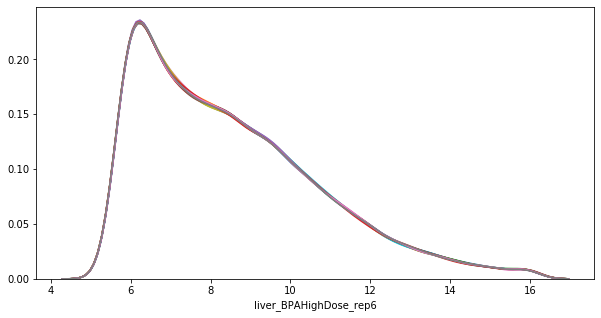

In [9]:
plt.figure(figsize=(10,5))
for i in range(1, data.shape[1], ):
    sns.distplot(data.iloc[:,i], hist=False)

Распределение для всех датасетов примерно одинаковое, нет явных выбросов.

### 4. Средние значения экспрессии генов

Усредним дубликаты.

In [10]:
data = data.groupby('Gene_ID').mean()
data.shape[0]

13321

Отлично, осталось 13321, как и в пункте 3.

Ну а теперь усредним значения экспрессии по группам control, low_dose и high_dose. И запишем это все в ДатаФрэйм.

In [11]:
data_control = data.iloc[:,0:6]
data_low = data.iloc[:,6:12]
data_high = data.iloc[:,12:18]


mean_control = data_control.mean(axis=1).rename('mean_control')
mean_low = data_low.mean(axis=1).rename('mean_low_dose')
mean_high = data_high.mean(axis=1).rename('mean_high_dose')

mean_data = pd.DataFrame([mean_control, mean_low, mean_high])
mean_data

Gene_ID,11287,11298,11302,11303,11305,11306,11307,11308,11350,11352,...,100505011,100505027,100505088,100505119,100505208,100505263,100505358,100526796,100529082,100616095
mean_control,15.355667,6.1245,7.779000,11.235167,8.555083,7.850167,8.133667,8.709417,6.979500,8.226833,...,6.4030,8.368833,6.964000,5.927667,6.377667,9.226667,6.007833,6.003500,14.529500,7.918500
mean_low_dose,15.364167,5.9955,7.540667,11.586667,8.476667,7.985833,8.011500,8.679917,7.016500,8.183667,...,6.4635,8.861333,7.012333,5.784500,6.593833,7.808333,6.289167,5.846833,14.468333,8.021667
mean_high_dose,15.365167,6.1370,7.862000,11.548167,8.689417,7.920417,8.120667,8.630417,6.944083,8.179167,...,6.3970,8.424000,7.045167,5.804000,6.442167,7.832833,6.286667,5.954667,14.748500,7.944167


(Тут столбцы - гены, а строки - средние значения для каждой групы, при желании, можно транспонировать .transpose())

### 5. Классификаторы и деревья

Необходимо воспользоваться деревом решений высотой 2 и построить классификаторы control vs low_dose, control vs high_dose.

Подготовлю данные:

In [12]:
def to_datasets(data1:pd.DataFrame, data2:pd.DataFrame, name1:str, name2:str):
    X = pd.concat([data1.transpose(), data2.transpose()], ignore_index=True)
    y = pd.Series([name1] * data1.shape[1] + [name2] * data2.shape[1])
    return X, y

X_controle_low, y_controle_low = to_datasets(data_control, data_low, 'controle', 'low_dose')
X_controle_high, y_controle_high = to_datasets(data_control, data_high, 'controle', 'high_dose')

In [13]:
def build_dtc_return_important_features(X, y):
    tree = DecisionTreeClassifier(max_depth=2, criterion = 'gini')
    tree.fit(X, y)
    plot_tree(tree)
    features = pd.DataFrame({'imp':tree.feature_importances_}).sort_values('imp',ascending=False)
    return features[features.imp>0].index[0:100]

##### Классификатор control vs low_dose

,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,liver_BPALowDose_rep3,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6
Gene_ID,,,,,,,,,,,,,,,,,,
77996,9.881,10.363,9.887,10.236,10.397,10.22,10.649,10.656,10.399,10.61,10.924,10.743,9.984,10.5,10.344,10.476,10.389,10.17


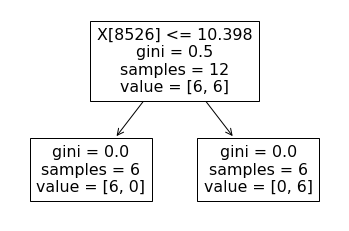

In [14]:
indexes = build_dtc_return_important_features(X_controle_low, y_controle_low)
data.iloc[indexes]

Тут получился единственный важный ген с айди 77996, но они каждый раз разные и дерево глубиной 1.

##### Классификатор control vs high_dose

,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,liver_BPALowDose_rep3,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6
Gene_ID,,,,,,,,,,,,,,,,,,
15112,14.044,13.87,13.808,13.846,13.77,14.035,13.741,13.742,13.649,13.776,14.103,13.611,13.691,13.542,13.563,13.758,13.741,13.505


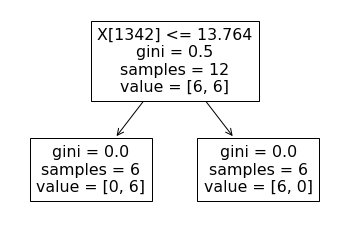

In [15]:
indexes = build_dtc_return_important_features(X_controle_high, y_controle_high)
data.iloc[indexes]

Тут тоже самое: 1 важный ген (15112), и дерево не строится глубже

Таким образом, у нас 2 проблемы:
1. При каждом запуске всегда только 1 важный ген, и они каждый раз разные (в данном случае это ... для  control vs low_dose и ... для  control vs high_dose.
2. Дерево строится глубины один, а не два. Это происходит потому что фичей много, и надо делать сэмплирование

#### Попробую тогда сделать randomForestClassifier, и пересеку их топ-100:

In [16]:
def build_rfc_return_important_features(X, y):
    rfc = RandomForestClassifier(n_estimators=10000, criterion="gini",max_depth=2)
    rfc.fit(X, y)
    features = pd.DataFrame({'imp':rfc.feature_importances_}).sort_values('imp',ascending=False)
    return features[features.imp>0].index[0:100]

In [17]:
# Для control vs low_dose
indexes_low_imp = build_rfc_return_important_features(X_controle_low, y_controle_low)
# Для control vs low_dose
indexes_high_imp = build_rfc_return_important_features(X_controle_high, y_controle_high)

Выведем общие:

In [18]:
genes_in_both = []
for i in range(len(indexes_high_imp)):
    for j in range(len(indexes_low_imp)):
        if indexes_high_imp[i] == indexes_low_imp[j]:
            genes_in_both.append(indexes_high_imp[i])
data.iloc[genes_in_both]

,liver_control_rep1,liver_control_rep2,liver_control_rep3,liver_control_rep4,liver_control_rep5,liver_control_rep6,liver_BPALowDose_rep1,liver_BPALowDose_rep2,liver_BPALowDose_rep3,liver_BPALowDose_rep4,liver_BPALowDose_rep5,liver_BPALowDose_rep6,liver_BPAHighDose_rep1,liver_BPAHighDose_rep2,liver_BPAHighDose_rep3,liver_BPAHighDose_rep4,liver_BPAHighDose_rep5,liver_BPAHighDose_rep6
Gene_ID,,,,,,,,,,,,,,,,,,
319967,7.6230,7.9640,7.5030,7.4110,7.5060,7.403,6.9880,7.140,7.022,7.1980,7.2490,7.3910,7.3300,7.047,7.141,7.1180,7.294,7.126
170753,7.7985,8.1795,8.0435,8.2605,8.0985,8.153,8.4025,8.635,8.326,8.5475,8.3065,8.7465,8.2855,8.345,8.287,8.4875,8.365,8.487
106326,7.2830,7.3330,7.2480,7.3790,7.3260,7.386,7.4640,7.713,7.519,7.4500,7.4070,7.6140,7.3350,7.501,7.438,7.4600,7.401,7.397


Вот, получилось три важных гена, совпадающих в обоих лесах.